# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dhafindra Razaqa Stefano]
- **Email:** [Dhafindra.razaqa@gmail.com]
- **ID Dicoding:** [dhafindrars]

## Menentukan Pertanyaan Bisnis
- Adakah hubungan antara hari libur dengan jumlah sepeda yang disewa?
- Adakah hubungan antara kondisi cuaca dengan jumlah sepeda yang disewa? 

## Import Semua Packages/Library yang Digunakan


In [69]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data

In [70]:
df1 = pd.read_csv('day.csv')
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [71]:
df2 = pd.read_csv('hour.csv')
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### karena dataset2 atau hour.csv lebih lengkap, maka dataset tersebut yang akan dipakai untuk analisis data

### Assessing Data

In [72]:
#Mencari tahu informasi tentang dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [73]:
#Mencari Missing Value
df2.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [74]:
#Mencari Duplicate Value
duplicates = {}

for column in df2.columns:
    duplicates[column] = df2.duplicated(subset=[column]).sum()

# Print the number of duplicates in each column
for column, n_duplicates in duplicates.items():
    print(f'{column}: {n_duplicates} duplicates')

instant: 0 duplicates
dteday: 16648 duplicates
season: 17375 duplicates
yr: 17377 duplicates
mnth: 17367 duplicates
hr: 17355 duplicates
holiday: 17377 duplicates
weekday: 17372 duplicates
workingday: 17377 duplicates
weathersit: 17375 duplicates
temp: 17329 duplicates
atemp: 17314 duplicates
hum: 17290 duplicates
windspeed: 17349 duplicates
casual: 17057 duplicates
registered: 16603 duplicates
cnt: 16510 duplicates


In [75]:
#Mencari outlier
outliers = {}
for column in df2.columns:
    if df2[column].dtype.kind in 'biufc':  # Check if the column is numeric
        Q1 = df2[column].quantile(0.25)  # First quartile (Q1)
        Q3 = df2[column].quantile(0.75)  # Third quartile (Q3)
        IQR = Q3 - Q1  # Interquartile range (IQR)
        # Define the range for non-outlier values
        non_outlier_range = (df2[column] >= Q1 - 1.5*IQR) & (df2[column] <= Q3 + 1.5*IQR)
        # Count the number of outliers and add to the dictionary
        outliers[column] = len(df2[column]) - non_outlier_range.sum()

# Print the number of outliers in each column
for column, n_outliers in outliers.items():
    print(f'{column}: {n_outliers} outliers')


instant: 0 outliers
season: 0 outliers
yr: 0 outliers
mnth: 0 outliers
hr: 0 outliers
holiday: 500 outliers
weekday: 0 outliers
workingday: 0 outliers
weathersit: 3 outliers
temp: 0 outliers
atemp: 0 outliers
hum: 22 outliers
windspeed: 342 outliers
casual: 1192 outliers
registered: 680 outliers
cnt: 505 outliers


### Cleaning Data

In [76]:
#Menghilangkan beberapa fitur yang tidak terpakai
dropkolom = ['instant', 'yr', 'atemp','hr']
df2 = df2.drop(dropkolom, axis=1)

In [77]:
#

## Exploratory Data Analysis (EDA)

### Explore korelasi antar fitur

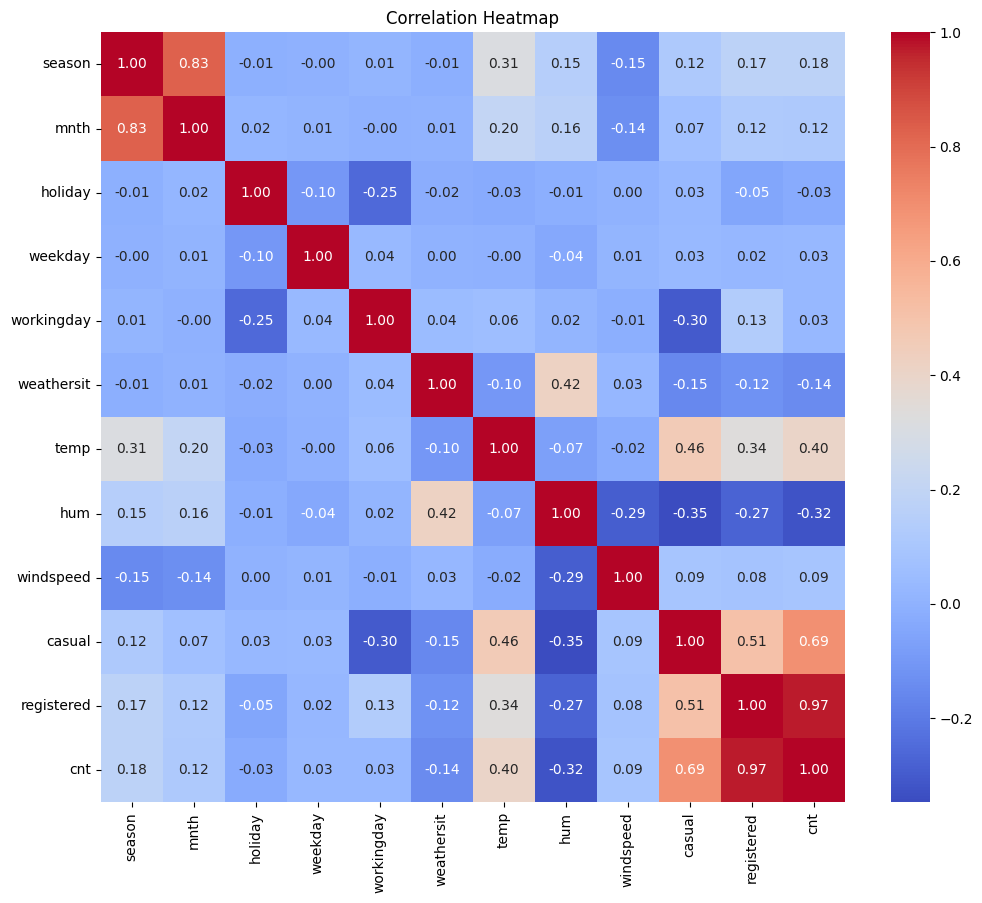

In [78]:
# Select only the numeric columns from the DataFrame
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix for the numeric columns
corr = df2[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [79]:
korelasi = df2['workingday'].corr(df2['cnt'])
print("Korelasi antara fitur 'workingday' dan 'cnt' adalah {}".format(korelasi))

korelasi = df2['weathersit'].corr(df2['cnt'])
print("Korelasi antara fitur 'weathersit' dan 'cnt' adalah {}".format(korelasi))

Korelasi antara fitur 'workingday' dan 'cnt' adalah 0.030284367747908773
Korelasi antara fitur 'weathersit' dan 'cnt' adalah -0.14242613813809538


## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

## Conclusion


- Conclution pertanyaan 1
- Conclution pertanyaan 2